<a href="https://colab.research.google.com/github/dawud-shakir/prof_trilce_notebooks/blob/main/plot_eigenfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline


The eigenfaces example
=============================================

Modified tutorial from scipy-lectures

https://www.scipy-lectures.org/packages/scikit-learn/auto_examples/plot_eigenfaces.html


In [ ]:
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()

faces.data.shape # shape of data

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


(400, 4096)

In [ ]:
faces.images[0].shape # shape of image 0

(64, 64)

Let's visualize these faces to see what we're working with



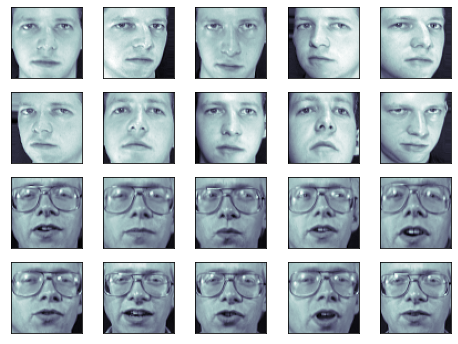

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8, 6))
# plot several images
for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

.. tip::

   Note is that these faces have already been localized and scaled to a
   common size. This is an important preprocessing piece for facial
   recognition, and is a process that can require a large collection of
   training data. This can be done in scikit-learn, but the challenge is
   gathering a sufficient amount of training data for the algorithm to work.
   Fortunately, this piece is common enough that it has been done. One good
   resource is
   `OpenCV <http://opencv.willowgarage.com/wiki/FaceRecognition>`__, the
   *Open Computer Vision Library*.




In [ ]:
X=faces.data
Y=faces.target

print(X.shape, Y.shape)

(400, 4096) (400,)


Preprocessing: Principal Component Analysis
-------------------------------------------

We can use PCA to reduce these 4096
features to a manageable size, while maintaining most of the information
in the dataset.



In [ ]:
from sklearn import decomposition
import numpy as np
#pca = decomposition.PCA(n_components=150, whiten=True)


pca = decomposition.PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d # number of components that explain 95% of the variance

123

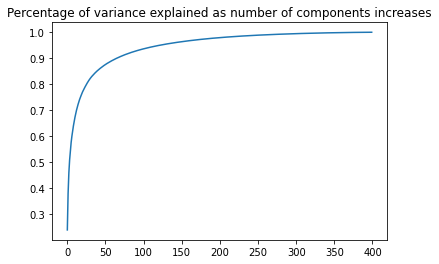

In [ ]:
from matplotlib import pyplot as plt
plt.plot(cumsum)
plt.title("Percentage of variance explained as number of components increases")
plt.show()

One interesting part of PCA is that it computes the "mean" face, which
can be interesting to examine:



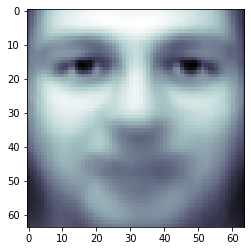

In [ ]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.bone)

The principal components measure deviations about this mean along
orthogonal axes.



In [ ]:
print(pca.components_.shape)

(400, 4096)


It is also interesting to visualize these principal components:



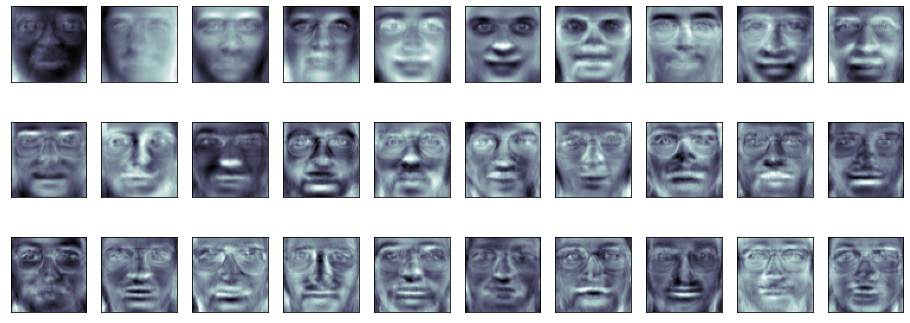

In [ ]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(faces.images[0].shape),
              cmap=plt.cm.bone)

The components ("eigenfaces") are ordered by their importance from
top-left to bottom-right. We see that the first few components seem to
primarily take care of lighting conditions; the remaining components
pull out certain identifying features: the nose, eyes, eyebrows, etc.

With this projection computed, we can now project our original training
and test data onto the PCA basis:




# Projection of custom images

Now lets upload and transform custom images

Upload the image you want to project


Saving Screen Shot 2023-03-09 at 6.43.33 AM.png to Screen Shot 2023-03-09 at 6.43.33 AM.png


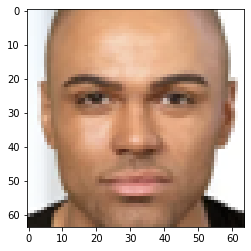

In [ ]:
from google.colab import files
import PIL
from PIL import Image
import io
from io import BytesIO




''' INPUT '''
print('Upload the image you want to project')
uploaded = files.upload()
key = list(uploaded.keys())[0]
_image = Image.open(BytesIO(uploaded[key]))

_image=_image.resize(faces.images[0].shape)


plt.imshow(_image, cmap=plt.cm.bone)


In [ ]:
# fit PCA to number of components that explain 95% of variance
pca = decomposition.PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)
print(pca.components_.shape)

(123, 4096)


In [ ]:
import numpy as np
import array
from numpy.testing import assert_array_almost_equal

_image = _image.convert("L") # convert to grayscale (1 channel)
image_data = np.array(_image)
image_data.shape
image_data = np.reshape(image_data,(1,-1)) # convert into array of size consistent with training data
image_data.shape

image_pca = pca.transform(image_data) # project data into reduced space

image_pca.shape  # print size of projected image



(1, 123)

pca.transform is equivalent to performing a mean substraction and a dot product with respect to the pca components.

Then we can project back into the original space and compute the reconstruction error

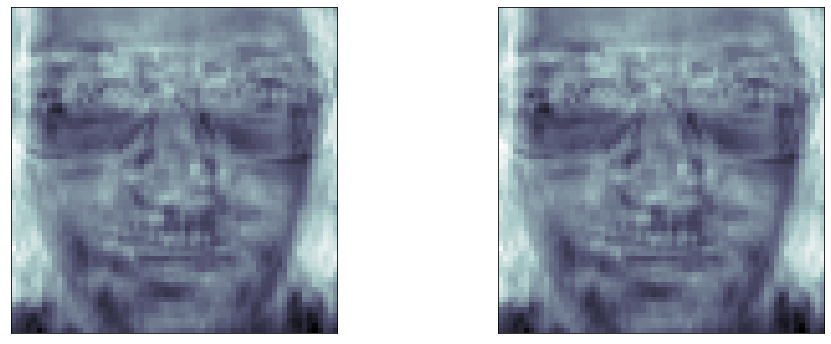

In [ ]:
# project data by directly multiplying with the pca components
image_pca2 = (image_data - pca.mean_).dot(pca.components_.T)

# raise error exception if the arrays are not "almost" equal
#assert_array_almost_equal(image_pca, image_pca2)


# Perform the inverse transformation with the built in method
X_projected = pca.inverse_transform(image_pca)

# and perform the inverse transformation by manually multipl
X_projected2 = image_pca2.dot(pca.components_) + pca.mean_

# raise error exception if the arrays are not "almost" equal
#assert_array_almost_equal(X_projected, X_projected2)


# plot reconstructed images
fig = plt.figure(figsize=(16, 6))

ax = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
ax.imshow(X_projected.reshape(faces.images[0].shape),cmap=plt.cm.bone)

ax = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
ax.imshow(X_projected2.reshape(faces.images[0].shape),cmap=plt.cm.bone)



In [ ]:
loss = ((image_data - X_projected) ** 2).mean()
loss

1063.255377126174

A Note on Facial Recognition
----------------------------

Here we have used PCA "eigenfaces" as a pre-processing step for facial
recognition. The reason we chose this is because PCA is a
broadly-applicable technique, which can be useful for a wide array of
data types. Research in the field of facial recognition in particular,
however, has shown that other more specific feature extraction methods
are can be much more effective.

